In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

df = pd.read_csv('spotify_data_clean.csv')
print("Shape (rows, columns):", df.shape)

df.head()

Shape (rows, columns): (8582, 15)


,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [22]:
# Basic info
df.info()

# Missing values count
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop rows with missing track_popularity
df = df.dropna(subset=['track_popularity'])

# Drop duplicate song entries
df = df.drop_duplicates(subset=['track_name', 'artist_name'])

# Convert milliseconds to minutes (easier to read)
if 'duration_ms' in df.columns:
    df['duration_min'] = df['duration_ms'] / 60000

print("\nCleaned shape:", df.shape)
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 7923 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            7923 non-null   object 
 1   track_name          7923 non-null   object 
 2   track_number        7923 non-null   int64  
 3   track_popularity    7923 non-null   int64  
 4   explicit            7923 non-null   bool   
 5   artist_name         7920 non-null   object 
 6   artist_popularity   7923 non-null   int64  
 7   artist_followers    7923 non-null   int64  
 8   artist_genres       4816 non-null   object 
 9   album_id            7923 non-null   object 
 10  album_name          7923 non-null   object 
 11  album_release_date  7923 non-null   object 
 12  album_total_tracks  7923 non-null   int64  
 13  album_type          7923 non-null   object 
 14  track_duration_min  7923 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(8)
memory usage: 93

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55


In [12]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric columns:", numeric_cols)

Numeric columns: ['track_number', 'track_popularity', 'artist_popularity', 'artist_followers', 'album_total_tracks', 'track_duration_min']


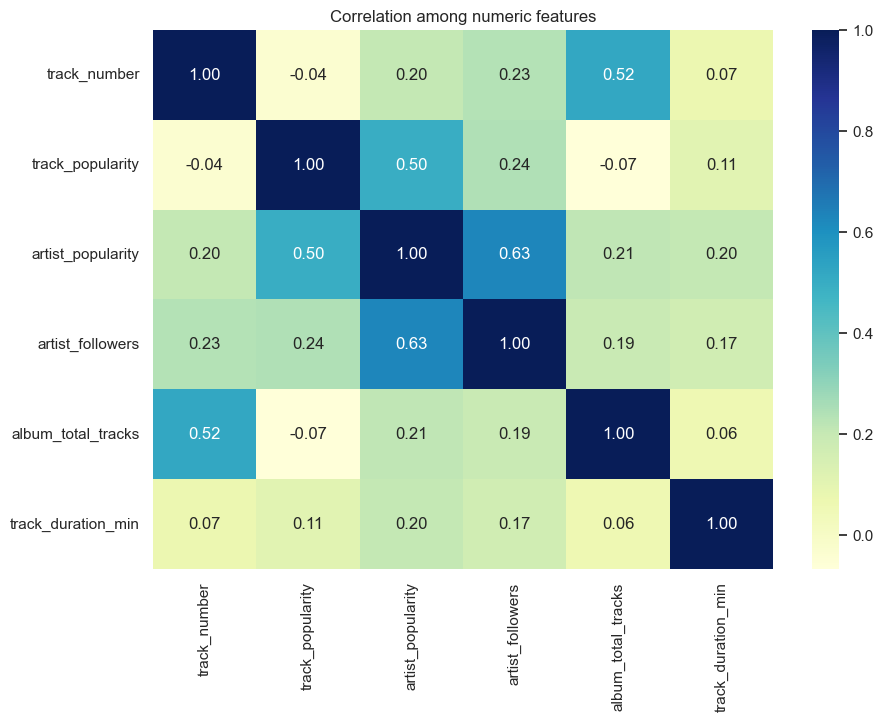

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df[numeric_cols].corr(), cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Correlation among numeric features')
plt.show()

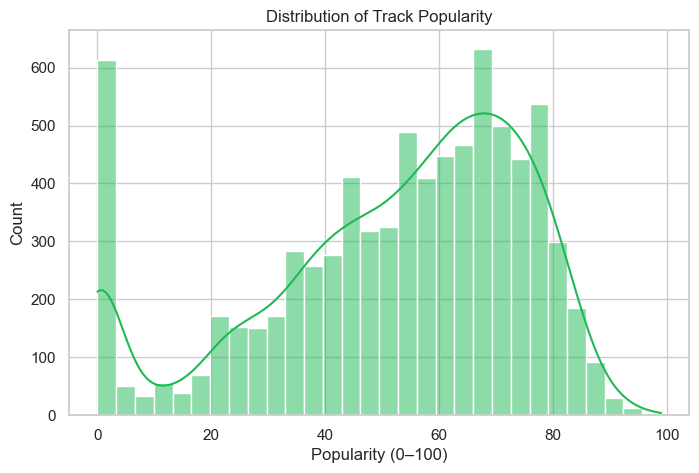

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['track_popularity'], bins=30, color='#1DB954', kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity (0–100)')
plt.ylabel('Count')
plt.show()

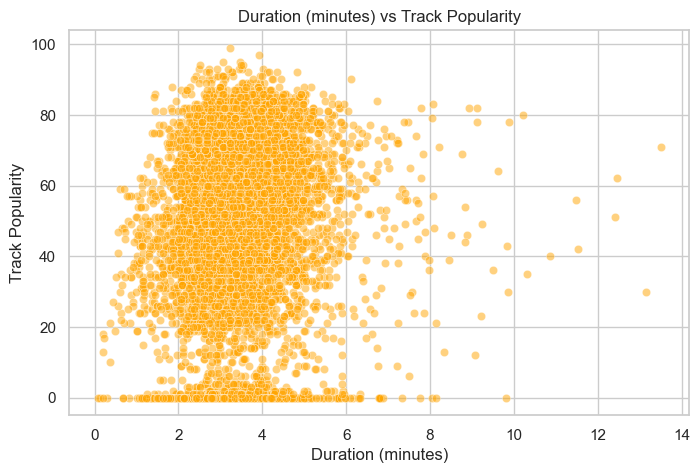

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='track_duration_min', y='track_popularity', data=df, color='orange', alpha=0.5)
plt.title('Duration (minutes) vs Track Popularity')
plt.xlabel('Duration (minutes)')
plt.ylabel('Track Popularity')
plt.show()

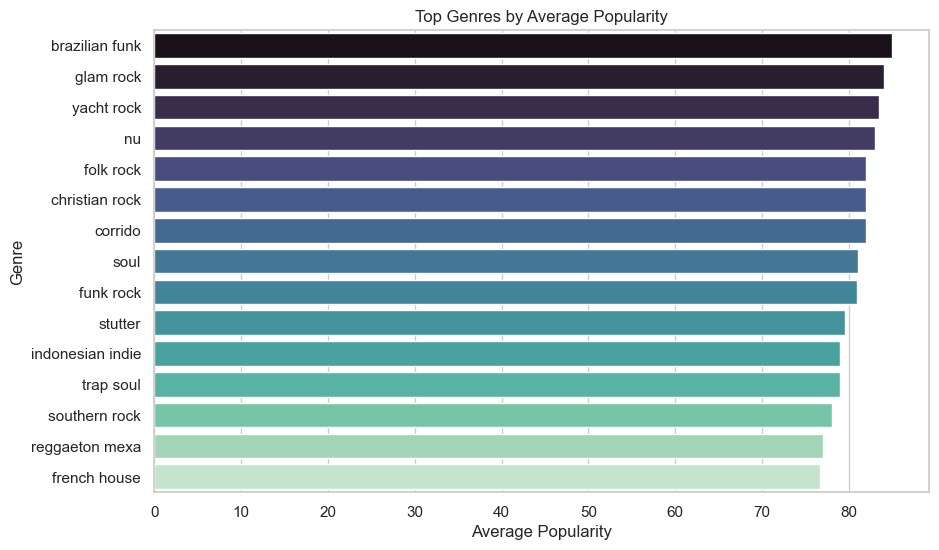

In [30]:
def first_genre(g):
    if pd.isna(g): 
        return 'Unknown'
    for sep in ['|', ',', ';']:
        if sep in g:
            return g.split(sep)[0].strip()
    return g.split()[0]

df['primary_genre'] = df['artist_genres'].apply(first_genre)

genre_pop = df.groupby('primary_genre')['track_popularity'].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
sns.barplot(x=genre_pop.values, y=genre_pop.index, hue=genre_pop.index, palette='mako', legend=False)
plt.title('Top Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()

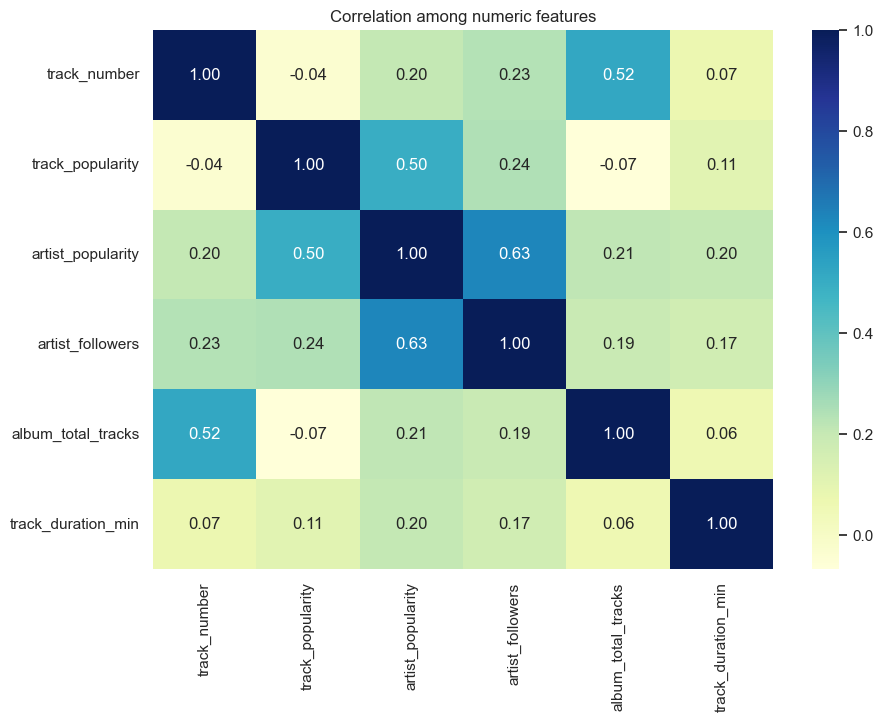

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(df[numeric_cols].corr(), cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Correlation among numeric features')
plt.savefig('spotify_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

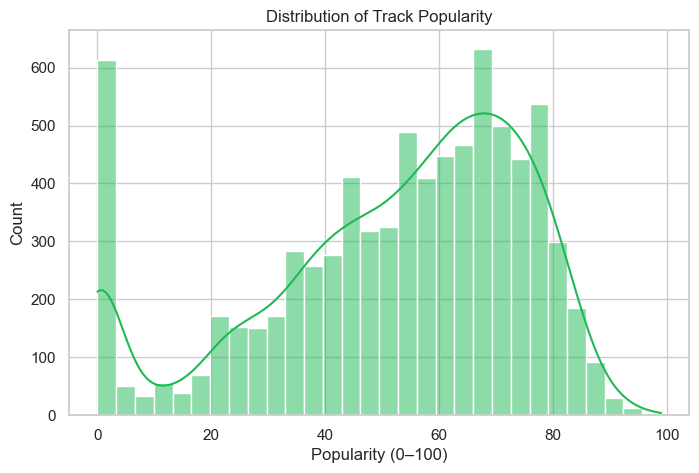

In [34]:
# 1️⃣ Popularity Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['track_popularity'], bins=30, color='#1DB954', kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity (0–100)')
plt.ylabel('Count')
plt.savefig('spotify_popularity_hist.png', dpi=300, bbox_inches='tight')
plt.show()

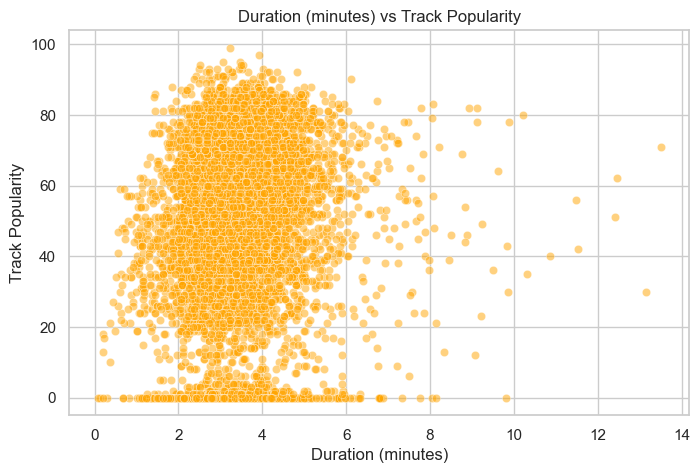

In [36]:
# 2️⃣ Duration vs Popularity
plt.figure(figsize=(8,5))
sns.scatterplot(x='track_duration_min', y='track_popularity', data=df, alpha=0.5, color='orange')
plt.title('Duration (minutes) vs Track Popularity')
plt.xlabel('Duration (minutes)')
plt.ylabel('Track Popularity')
plt.savefig('spotify_duration_vs_popularity.png', dpi=300, bbox_inches='tight')
plt.show()